<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 2 
For the "Median value of owner-occupied homes" provide a boxplot

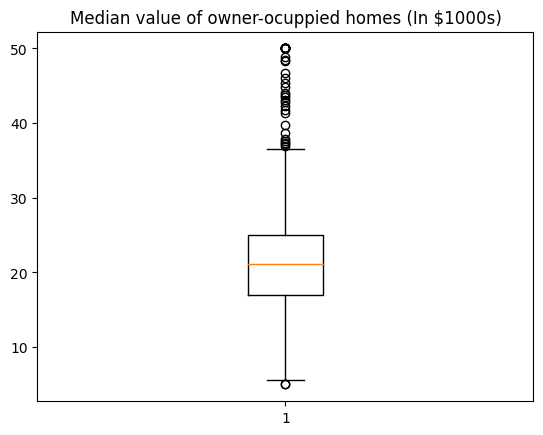

In [6]:
pyplot.boxplot(boston_df['MEDV'])
pyplot.title('Median value of owner-ocuppied homes (In $1000s)')
pyplot.show()

Provide a  bar plot for the Charles river variable



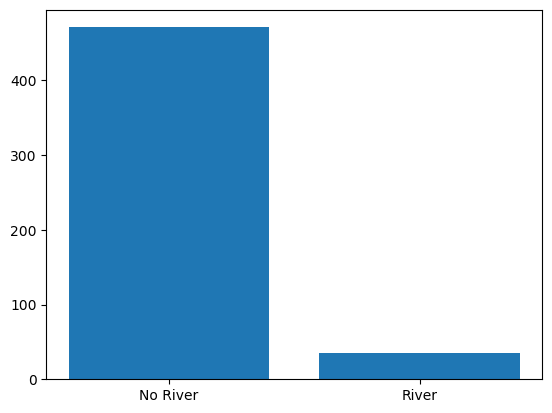

In [12]:
chas_count = boston_df['CHAS'].value_counts()
chas_label = ['No River', 'River']
plt.bar(chas_label, chas_count)
plt.show()

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

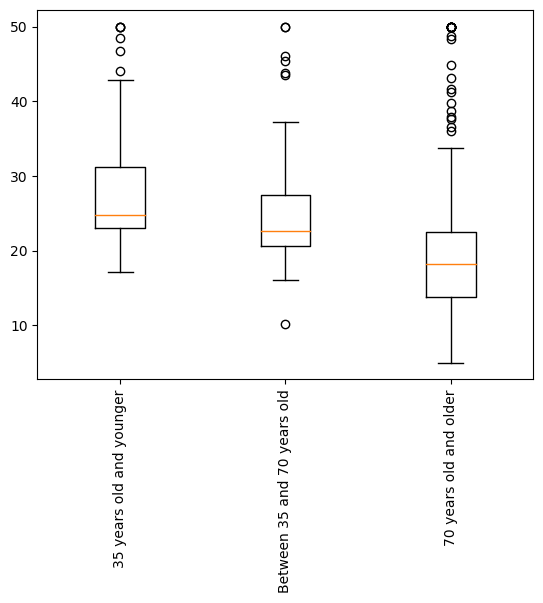

In [37]:
bins = [0, 35, 70, float('inf')]
labels = '35 years old and younger', 'Between 35 and 70 years old', '70 years old and older'
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins = bins, labels = labels, right = False)
grouped_data = [boston_df[boston_df['Age_Group'] == label]['MEDV'] for label in labels]
plt.boxplot(grouped_data, labels = labels)
plt.xticks(rotation = 'vertical')
plt.show()

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

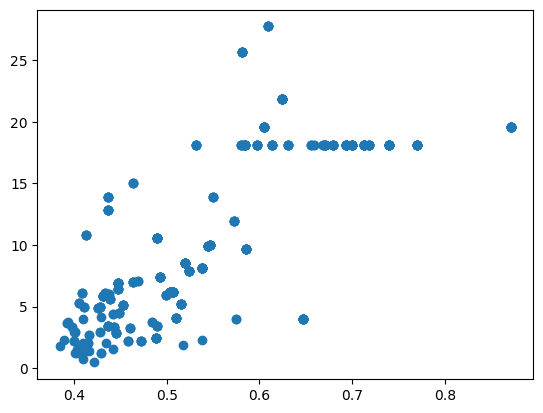

In [38]:
plt.scatter(boston_df['NOX'], boston_df['INDUS'])

Create a histogram for the pupil to teacher ratio variable

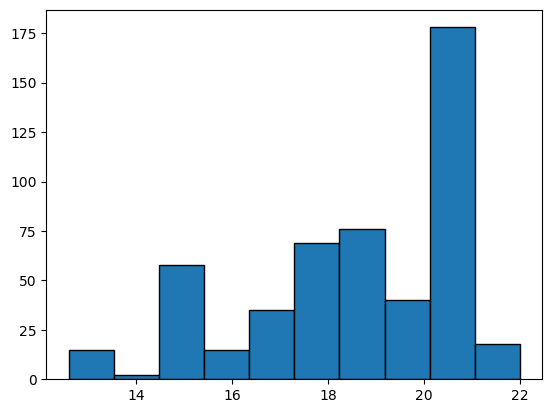

In [40]:
plt.hist(boston_df['PTRATIO'], bins = 10, edgecolor = 'black')
plt.show()

## Task 3 
For the "Median value of owner-occupied homes" provide a boxplot

In [50]:
chas_not = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_value_ttest = stats.ttest_ind(chas_not, chas_yes, equal_var = False) 
print(f"t stat: {t_stat}")
print(f"P value t test: {p_value_ttest}")

t stat: -3.113291312794837
P value t test: 0.003567170098137517


##### Since the P-value is less than the null hypothesis (.05) we reject it. So there is a significant difference in median value 

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [56]:
boston_df['Age_category'] = pd.cut(boston_df['AGE'], bins = bins, labels = labels)
anova_model = ols('MEDV ~ DIS', data = boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
DIS,2668.246572,1.0,33.57957,1.206612e-08
Residual,40048.048843,504.0,NaN,NaN


##### Since the p-value is less than .05, we reject the H0. There is a significant difference in median house values

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [63]:
pearson_corr, p_value_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson correlation: {pearson_corr}\n P Value Correlation: {p_value_corr}")


Pearson correlation: 0.7636514469209192
 P Value Correlation: 7.913361061210442e-98


##### Since the p-value is less than .05, we reject the H0, there is a strong positive linear relationship between NOX and INDUS

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [64]:
regression_model = ols('MEDV ~ DIS', data = boston_df).fit()
regression_summary = regression_model.summary()
print(regression_summary)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        13:58:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

##### Because the p-value is smaller than .05, we reject the H0. DIS significantly effects the Boston EMployment Centres on the median value of owner occupied homes.